# Exercise 1: Numpy Introduction

You should probably check out the later exercises, as they are a bit more interesting.

In [1]:
%matplotlib inline

import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A: Matrix Standardization

In [2]:
def standardize(matrix):
    """Standardizes a data matrix by ensuring that its data has zero
    mean and unit variance."""
    
    mean = np.mean(matrix)
    std = np.std(matrix)
    return (matrix - mean) / std

In [3]:
random_factor = np.random.randint(-10, 11)
dummy_matrix = np.random.random([100, 100]) * random_factor
dummy_matrix

array([[ 1.37663277,  0.96525213,  2.79550165, ...,  0.71737406,
         3.22487868,  5.07149156],
       [ 4.91485388,  2.18632856,  1.42180133, ...,  2.844507  ,
         4.31825415,  2.47871268],
       [ 0.61277169,  2.45095393,  4.10993278, ...,  4.59677493,
         5.58434057,  0.50229141],
       ..., 
       [ 0.328085  ,  0.9976518 ,  2.9617762 , ...,  4.62121713,
         1.43027945,  5.03066943],
       [ 0.25634006,  4.12316719,  5.19043347, ...,  3.86019473,
         4.63466394,  4.55094241],
       [ 5.70142001,  4.68607817,  1.21539022, ...,  3.22335537,
         5.32090969,  4.86755712]])

In [4]:
print("Old mean: %f" % np.mean(dummy_matrix))
print("Old std:  %f" % np.std(dummy_matrix))
std_matrix = standardize(dummy_matrix)
print("New mean: %f" % np.mean(std_matrix))
print("New std:  %f" % np.std(std_matrix))

Old mean: 3.002396
Old std:  1.728083
New mean: 0.000000
New std:  1.000000


# B: Pairwise Distances in the Plane

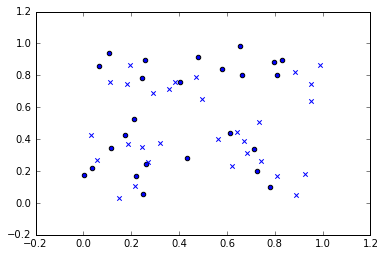

In [5]:
p = 25
q = 30
frame_1 = np.random.random([p, 2])
frame_2 = np.random.random([q, 2])
ax = plt.scatter(frame_1[:,0], frame_1[:, 1])
ax = plt.scatter(frame_2[:,0], frame_2[:, 1], marker='x')

In [6]:
def pairwise_distances(P, Q):
    """Computes pairwise cosine distances between points."""
    return np.dot(P, Q.T)

pairwise_distances(frame_1, frame_2)

array([[ 0.03142085,  0.21079769,  0.03935348,  0.27843754,  0.08587683,
         0.26560627,  0.12766675,  0.06838271,  0.07963782,  0.2408968 ,
         0.05949406,  0.13717645,  0.09615629,  0.18467804,  0.16041964,
         0.2111035 ,  0.06677799,  0.1004034 ,  0.16790648,  0.08176212,
         0.02903116,  0.18858404,  0.16215045,  0.18759151,  0.22497525,
         0.10993957,  0.19925696,  0.29423588,  0.15992156,  0.27279448],
       [ 0.37630768,  0.60861538,  0.11362653,  1.17857511,  0.7287693 ,
         1.20295277,  0.80313723,  0.69693797,  0.43267384,  0.68731264,
         0.21545388,  0.85878619,  0.84072242,  0.74637115,  0.93616843,
         0.85233188,  0.41630993,  0.50244956,  0.5530208 ,  0.37263612,
         0.26119649,  0.71414751,  0.66333443,  0.6570456 ,  0.55526486,
         0.74702441,  0.64899796,  1.30000979,  0.83719677,  1.08929935],
       [ 0.1087582 ,  0.61874733,  0.11551325,  0.83897386,  0.2799011 ,
         0.80486584,  0.39988654,  0.22963226,  0

# C: Likelihood of a data sample

$$ p(x \mid \mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2}(x - \mu)^{T} \Sigma^{-1}(x - \mu) \right) $$

In [7]:
def log_likelihood(data, theta):
    """Computes the log likelihood of the data (x) given the model theta.
    See above for the full formula."""
    
    mu, sigma = theta
    d, _ = sigma.shape
    
    det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    x_mu = data - mu
        
    log_denominator = np.log(2 * np.pi) * (d / 2) + 0.5 * np.log(det)
    exponent = -0.5 * np.sum(x_mu * np.dot(x_mu, sigma_inv), axis=1)
    
    return exponent - log_denominator


def max_likelihood(data, thetas):
    """Returns an index array which, for every row in the original data
    matrix, contains the index of the model with the maximum likelihood."""
    results = np.array([log_likelihood(data, theta) for theta in thetas])
    res = np.argmax(results, axis=0)
    return res

In [8]:
# The number of data points, the dimensionality of the data,
# and the models we want to try out.
n = 150
d = 2
model_count = 4

# The data matrix
X = np.random.random([n, d])

# The mus in the models.
mus = np.array([np.random.random(d) for _ in range(model_count)])

# The sigmas in the models.
# Use nicely-shaped clusters, as suggested by the TA sample implementation.
S = np.diag(np.random.rand(d, d).diagonal())
sigmas = [S] * model_count

thetas = zip(mus, sigmas)
ML = max_likelihood(X, thetas)

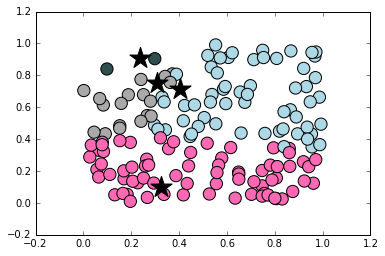

In [11]:
color_list = list(matplotlib.colors.cnames.keys())
random.shuffle(color_list)
colormap = np.array(color_list[:model_count])[ML]

ax = plt.scatter(X[:, 0], X[:, 1], c=colormap, s=150)
ax = plt.scatter(mus[:, 0], mus[:, 1], c='black', s=500, marker='*')